# Modelling

In [ ]:
def confusion_mat(test_y,predict_y):
    ''' Function to Visualize the Confusion Matrix'''

    labels = [0,1]
    plt.figure(figsize=(6,6))
    cmap=sns.light_palette("blue")
    C = confusion_matrix(test_y, predict_y)
    print("Percentage of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100)
    sns.heatmap(C, cmap="Blues",annot=True,annot_kws={"size": 16},fmt='g')
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title('Confusion matrix')

    plt.show()

### XGBoost with important features using Randomized CV hyperparameter tuning

In [ ]:
x_cfl_h=XGBClassifier(scale_pos_weight=10)

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl1=RandomizedSearchCV(x_cfl_h,param_distributions=prams,n_jobs=-1,scoring='f1',verbose=10)
random_cfl1.fit(X_train_XGB,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 17.2min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 19.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 31.7min finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1...
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='deprecated', n_it

In [ ]:
print (random_cfl1.best_params_)

{'subsample': 0.5, 'n_estimators': 2000, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 1}



 Predicting F1 score for train,cv and test data with best hyperparameter 

F1 score for train data 1.0
F1_score for cv data 0.8141592920353983
F1_score for test data 0.8254847645429363
****************************************************************************************************
Confusion Matrix for the Train Data  

Percentage of misclassified points  0.0


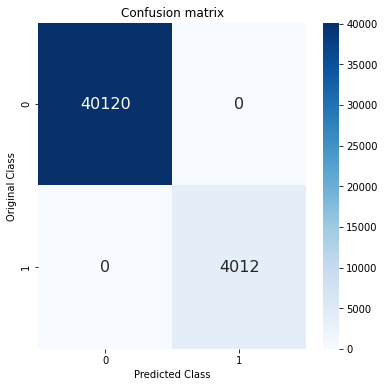

****************************************************************************************************
Confusion Matrix for the Test Data  

Percentage of misclassified points  0.525


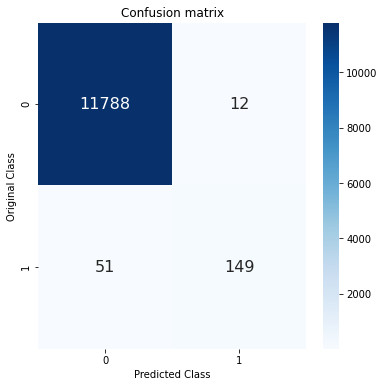

****************************************************************************************************


In [ ]:
x_cfl_h=XGBClassifier(n_estimators=2000,subsample=0.5,max_depth=5,learning_rate=0.05,colsample_bytree=1,scale_pos_weight=10)
x_cfl_h.fit(X_train_XGB, y_train)
sig_clf_h = CalibratedClassifierCV(x_cfl_h, method="isotonic")
sig_clf_h.fit(X_train_XGB, y_train)

#displaying the perfomance metric for train,cv and test data
print('\n Predicting F1 score for train,cv and test data with best hyperparameter \n')
pred_y_train =sig_clf_h.predict(X_train_XGB)
print ('F1 score for train data',f1_score(y_train, pred_y_train,average='binary' ))
pred_y_cv = sig_clf_h.predict(X_cv_XGB)
print ('F1_score for cv data',f1_score(y_cv, pred_y_cv, average='binary'))
pred_y_test = sig_clf_h.predict(X_test_XGB)
print ('F1_score for test data',f1_score(y_test, pred_y_test, average='binary'))
print('*'*100)
print("Confusion Matrix for the Train Data ",'\n')
confusion_mat(y_train,pred_y_train)
print('*'*100)
print("Confusion Matrix for the Test Data ",'\n')
confusion_mat(y_test,pred_y_test)
print('*'*100)